<a href="https://colab.research.google.com/github/dcamcan1/MLA_DCC/blob/main/MLA2_DCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 2#  
**Danny Cannon**  
**CS-430-ON**

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#Linear Regression
from sklearn.linear_model import LinearRegression

#Logistic Regression
from sklearn.linear_model import LogisticRegression

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

Loading the file

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

Renaming the columns

In [9]:
df = df.rename(columns={'Usage_kWh':'usage_kwh',
                  'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh',
                  'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh',
                  'CO2(tCO2)':'co2_tco2',
                  'Lagging_Current_Power_Factor':'lag_current_pwr',
                  'Leading_Current_Power_Factor':'lead_current_pwr',
                  'NSM':'nsm',
                  'WeekStatus':'week_status',
                  'Day_of_week':'day_of_week',
                  'Load_Type':'load_type'})
df


,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,co2_tco2,lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


### Statistical and Visual Exploration

Summarize the numerical columns of data.

In [10]:
df.describe()

,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,co2_tco2,lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Get the counts of the different load types. Save this into a data frame so you can plot it.

In [11]:
load_type_count = df['load_type'].value_counts()
df_counts = pd.DataFrame(load_type_count)

Create a barplot to view how many days fall under each load type. The size of the plot should 10 x 5.

<Figure size 1000x500 with 0 Axes>

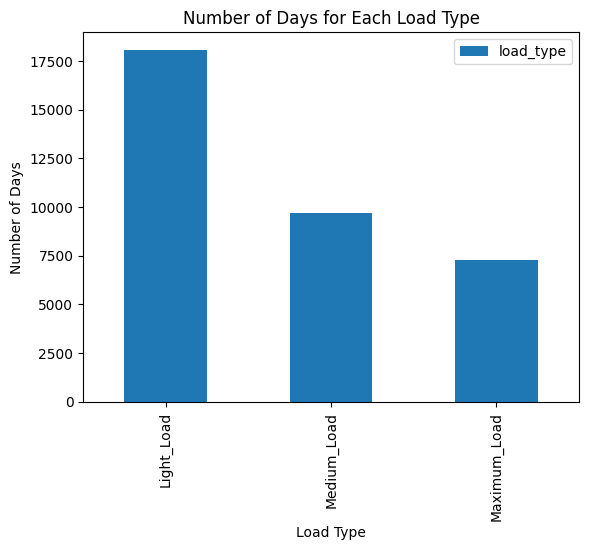

In [12]:
plt.figure(figsize=(10, 5))
df_counts.plot(kind='bar')
plt.title('Number of Days for Each Load Type')
plt.xlabel('Load Type')
plt.ylabel('Number of Days')
plt.show()

Create a pairplot of all of the numerical variables using Seaborn.

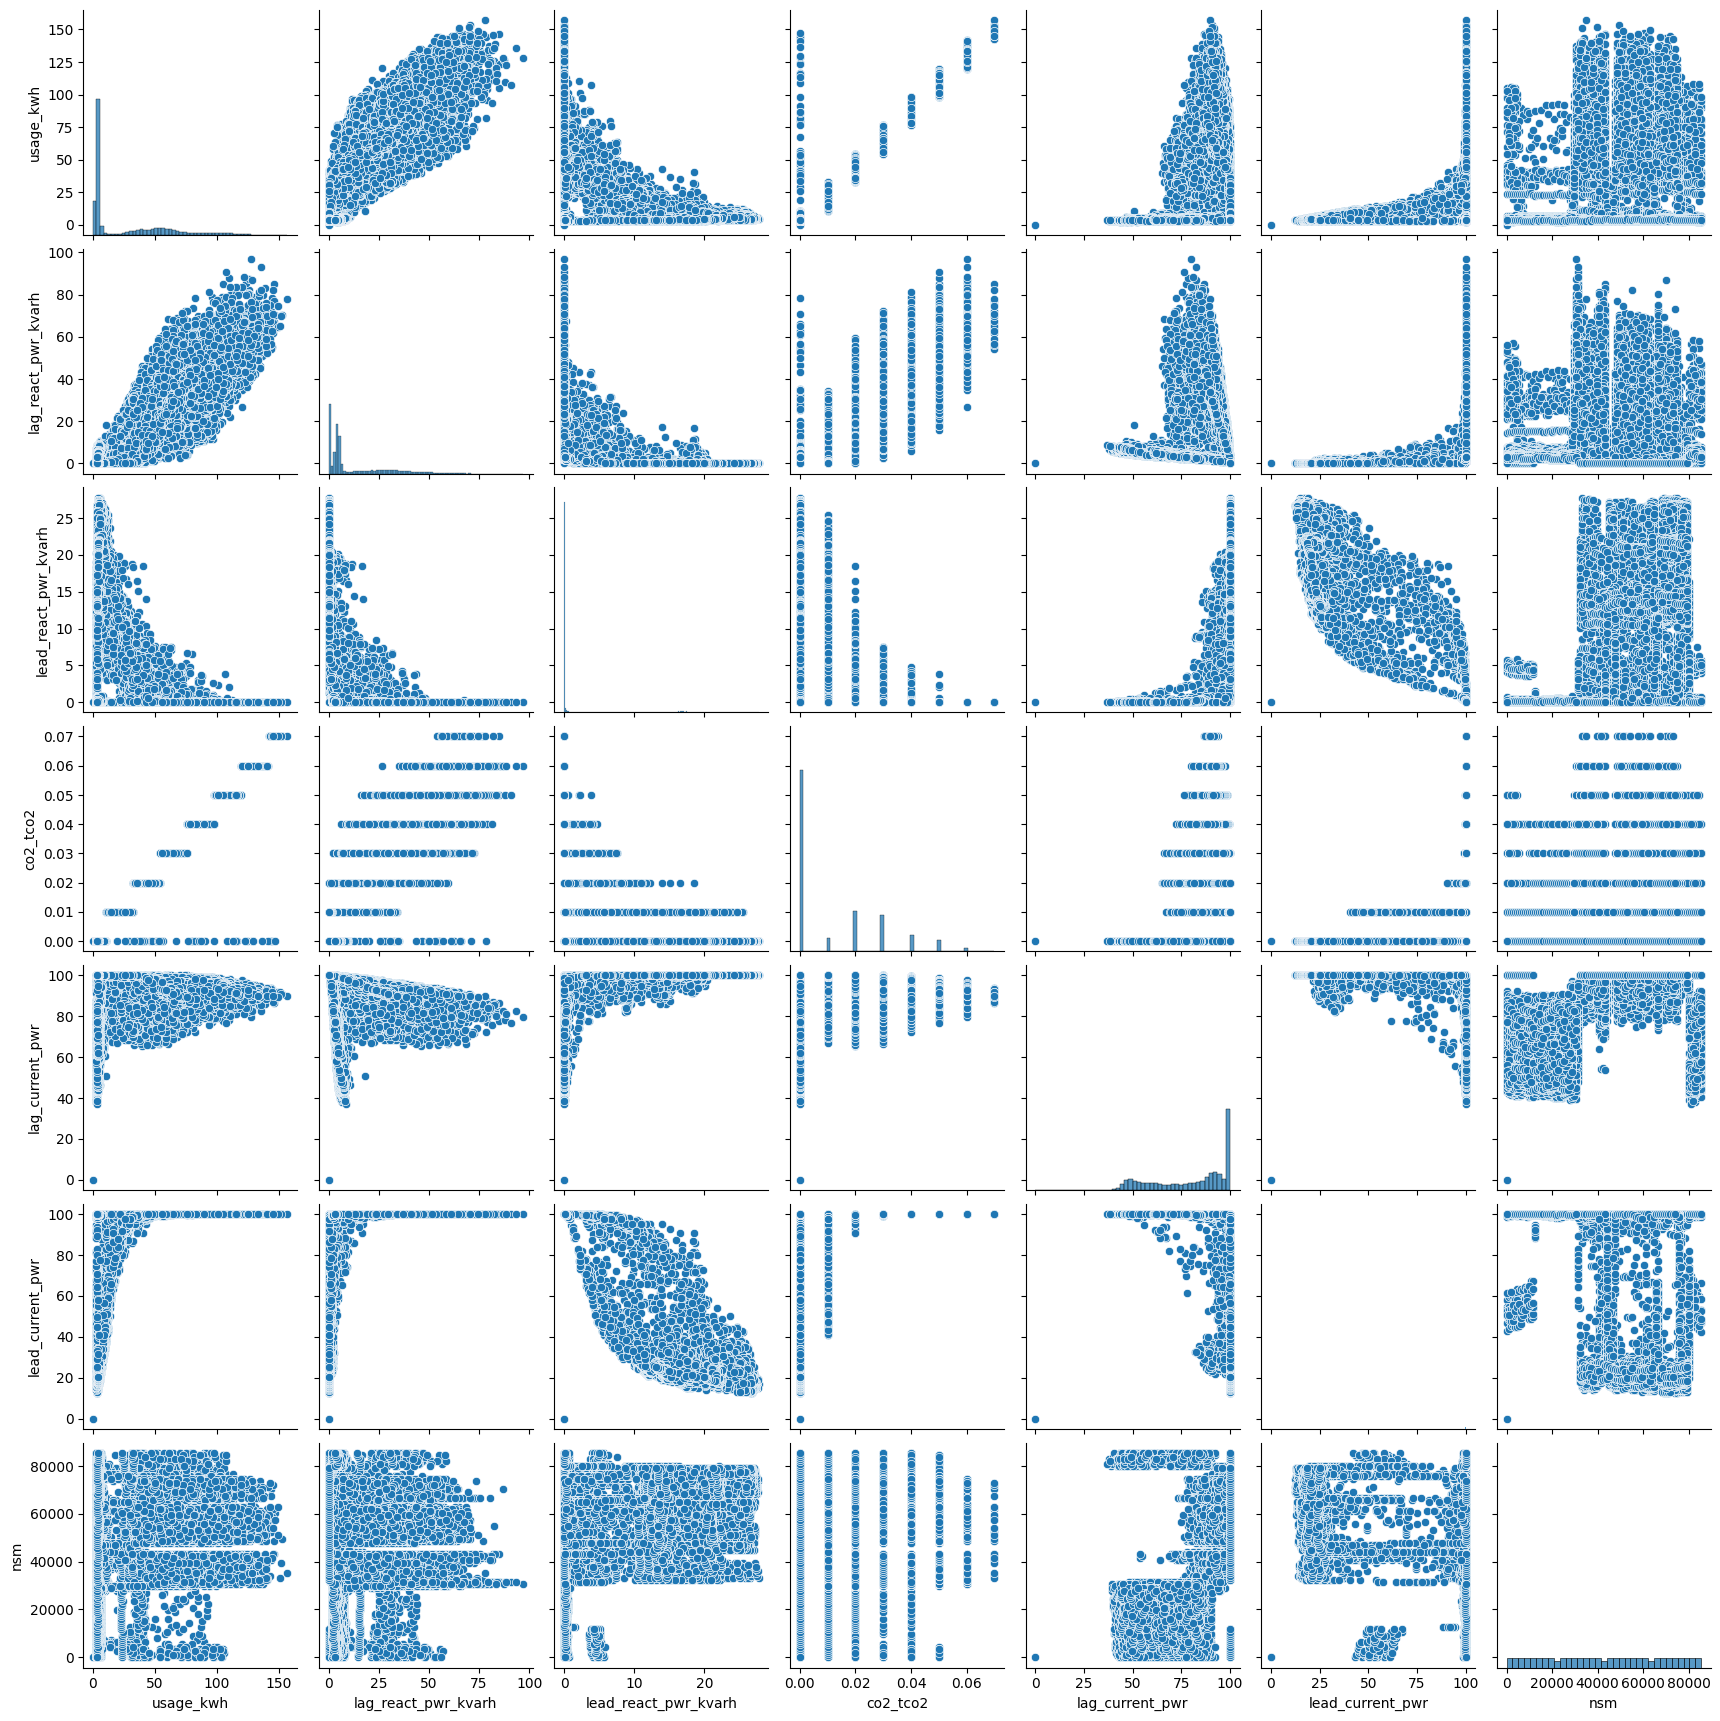

In [13]:
sns.pairplot(df)

In a Markdown comment - write up any interesting patterns you see from the pairplot.

Usage and lag react seem to have a linear relationship

### Splitting Data into Train/Test

Create a data frame called X of your inputs that includes all columns except date and usage_kwh.

In [14]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'week_status', 'day_of_week', 'load_type']]

Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.

In [15]:
y = df[['usage_kwh']]

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Building the Pipeline

Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).

In [17]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
                'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week', 'load_type']

col_transform = ColumnTransformer(transformers=[
                               ('cat', OneHotEncoder(), cat_attribs),
                               ('num', MinMaxScaler(), num_attribs)],
                               remainder = 'passthrough'
                  )

Create a pipeline that will transform the data and then run a LinearRegression.

In [18]:
pipeline = Pipeline([
                     ('transform', col_transform),
                     ('model', LinearRegression()),
])

set_config(display='diagram')
pipeline

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('model', LinearRegression())])

### Executing the Model

Run the pipeline to fit the Linear Regression Model.

In [19]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('model', LinearRegression())])

### Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [20]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

Calculate the root mean squared error for both train and test. In a Markdown comment below the result, interpret the output you receive.

In [21]:
print(mean_squared_error(y_train, y_train_pred)**(0.5))
print(mean_squared_error(y_test, y_test_pred)**(0.5))

# The output indicates that the model is consistent because
# the RSME is similar for both the test and train

9.624935136096196
9.628400871760808


Calculate the R-squared value of the model (test only).  In a Markdown comment below the result, interpret the output you receive.

In [22]:
r2_score(y_test, y_test_pred)

# The output indicates that the model is a good fit, accurate >91% of the time

0.9158754347511985

Write the code to display the intercept value(bias)  and coefficients of the model. (These will be two different lines of code).

In [23]:
#Intercept
pipeline.named_steps['model'].intercept_

array([-2.71781982e+12])

In [24]:
#Coefficients
pipeline.named_steps['model'].coef_

array([[ 8.77295116e+13, -2.34414838e+13, -3.47398184e+13,
        -3.47398184e+13,  7.64311771e+13,  7.64311771e+13,
        -3.47398184e+13, -3.47398184e+13, -3.47398184e+13,
        -5.02718734e+13, -5.02718734e+13, -5.02718734e+13,
         1.39946861e+02,  2.32133403e-01,  3.90364132e+01,
         2.55676443e+01,  5.43531916e-01]])

### Conclusion
Write a general conclusion about the results of your model.

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting kwh usage.

In [25]:
# Based on the evaluation, the model seems to be very suitable
# for predicting kwh usage.

## Problem 2

### Reading the Data

You have already read the data into a dataframe named df.  However, you need to recode the 'week_status' column so a Weekday is coded as 1 and a Weekend is coded as a 0.

In [26]:
df['week_status'] = df['week_status'].apply(lambda x: 1 if x == "Weekday" else 0)

### Splitting Data into Train/Test

Create a data frame called X of your inputs that includes all columns except date, week_status, and day_of_week.

In [27]:
X = df[['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'lag_current_pwr', 'lead_current_pwr', 'nsm', 'load_type']]

Create a data frame called y that contains week_status. This will be your target variable.

In [28]:
y = df[['week_status']]

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Building the Pipeline

Create a column transformer that will OneHotEncode the categorical variables (not the output/target variable) and MinMax scale the numerical variables (not the output).

In [30]:
num_attribs = ['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
                'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['load_type']

col_transform = ColumnTransformer(transformers=[
                               ('cat', OneHotEncoder(), cat_attribs),
                               ('num', MinMaxScaler(), num_attribs)],
                               remainder = 'passthrough'
                  )

Create a pipeline that will transform the data and then run a LogisticRegression.

In [31]:
pipeline2 = Pipeline([
                     ('trans', col_transform),
                     ('model2', LogisticRegression(max_iter=1000)),
                     ])

set_config(display='diagram')
pipeline2

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('model2', LogisticRegression(max_iter=1000))])

### Executing the Model

Run the pipeline to fit the Linear Regression Model.

In [32]:
pipeline2.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('model2', LogisticRegression(max_iter=1000))])

### Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [33]:
y_pred = pipeline2.predict(X_test)

Call the plot_cm function to generate the confusion matrix.

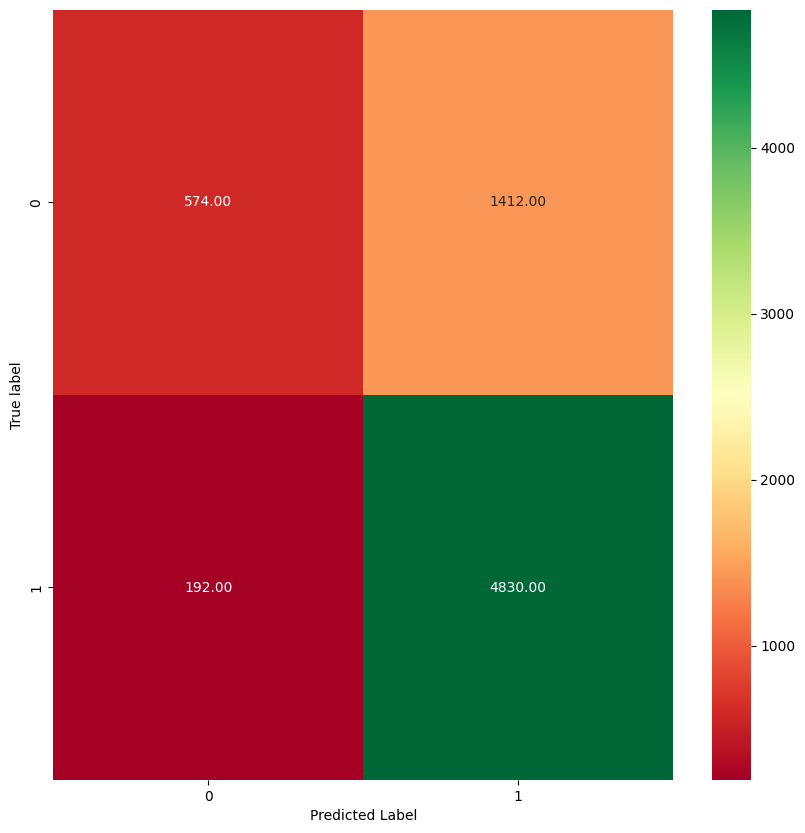

In [34]:
plot_cm(y_test,y_pred)

Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

In [35]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

# The precision score is decent - recall and F1 scores are good.
# This means that positive instances are correctly classified

0.7737904517782762
0.961768219832736
0.8575994318181818


Generate an ROC Curve or a Precision-Recall Curve as appropriate with (AUC). In a comment below your results, interpret your results and explain why your choice of curve.

0.7676171471908296


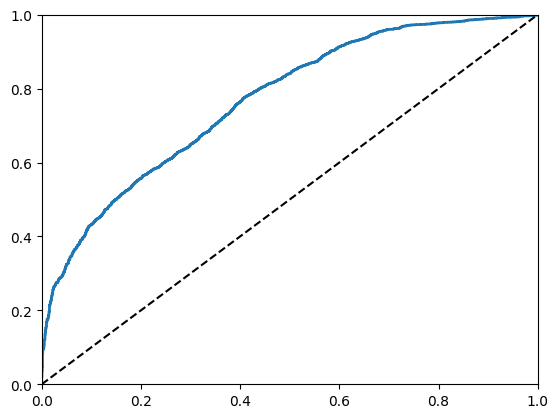

In [36]:
y_pred_proba = pipeline2.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_proba)
plot_roc_curve(fpr, tpr)
print(roc_auc_score(y_test, y_pred_proba))

# The ROC Curve indicates that the model has "good" performance, not great
# ROC Curve is appropriate because it is a balanced data set

### Conclusion
Write a general conclusion about the results of your model.

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting week_status.

In [37]:
# The model is decent at predicting week_status, but not exceptional.